In [1]:
!pip install uproot
pip install vector

SyntaxError: invalid syntax (842929449.py, line 2)

In [2]:
import uproot as ur
import pandas as pd
import numpy as np
import vector

import warnings

warnings.filterwarnings('ignore')

In [3]:
# specify the directory of the file to be inspected
rootfile_dir = '/Users/mertdil/cmsgrid_final_1-40.root'

# open the file using the assigned directory
rootfile = ur.open(rootfile_dir)
# show the keys available in this file
rootfile.keys()

['ProcessID0;1',
 'ProcessID1;1',
 'ProcessID2;1',
 'ProcessID3;1',
 'ProcessID4;1',
 'ProcessID5;1',
 'ProcessID6;1',
 'ProcessID7;1',
 'ProcessID8;1',
 'ProcessID9;1',
 'ProcessID10;1',
 'ProcessID11;1',
 'ProcessID12;1',
 'ProcessID13;1',
 'ProcessID14;1',
 'ProcessID15;1',
 'ProcessID16;1',
 'ProcessID17;1',
 'ProcessID18;1',
 'ProcessID19;1',
 'ProcessID20;1',
 'ProcessID21;1',
 'ProcessID22;1',
 'ProcessID23;1',
 'ProcessID24;1',
 'ProcessID25;1',
 'ProcessID26;1',
 'ProcessID27;1',
 'ProcessID28;1',
 'ProcessID29;1',
 'ProcessID30;1',
 'ProcessID31;1',
 'ProcessID32;1',
 'ProcessID33;1',
 'ProcessID34;1',
 'ProcessID35;1',
 'ProcessID36;1',
 'ProcessID37;1',
 'ProcessID38;1',
 'ProcessID39;1',
 'Delphes;1']

In [4]:
# assign a variable to the tree named 'Delphes'
delphes_tree = rootfile['Delphes']
# inspect the content of the tree
delphes_tree.show()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | int32_t                  | AsDtype('>i4')
Event/Event.fUniq... | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event/Event.fBits    | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event/Event.Number   | int64_t[]                | AsJagged(AsDtype('>i8'))
Event/Event.ReadTime | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.ProcTime | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Proce... | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.MPI      | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.Weight   | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Cross... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Cross... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Scale    | 

In [7]:
# assign a variable to the tree containing particle information
particle_tree = delphes_tree["Event"]
particle_tree.show()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | int32_t                  | AsDtype('>i4')                
Event.fUniqueID      | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event.fBits          | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event.Number         | int64_t[]                | AsJagged(AsDtype('>i8'))
Event.ReadTime       | float[]                  | AsJagged(AsDtype('>f4'))
Event.ProcTime       | float[]                  | AsJagged(AsDtype('>f4'))
Event.ProcessID      | int32_t[]                | AsJagged(AsDtype('>i4'))
Event.MPI            | int32_t[]                | AsJagged(AsDtype('>i4'))
Event.Weight         | float[]                  | AsJagged(AsDtype('>f4'))
Event.CrossSection   | float[]                  | AsJagged(AsDtype('>f4'))
Event.CrossSectio... | float[]                  | AsJagged(AsDtype('>f4'))
Event.S

In [10]:
# create a list containing the required fields from the above given table
required_fields = ["Event.Number"]

In [11]:
# create an empty list to store subsets of particle dataframe
particle_df_subsets = []

# for each subset of particles that have a maximum size of 2 GB for the required fields
for particle_subset in particle_tree.iterate(required_fields, step_size='1 GB', library='pd'):
    
    # append the subset dataframe to the list created at the beginning of the cell
    particle_df_subsets.append(particle_subset)

In [13]:
# concatenate the list of subsets into a single dataframe
particle_df = pd.concat(particle_df_subsets)

# save memory by deleting subset list from memory
del particle_df_subsets

# rename the columns to get easier access
df_columns =["Jet.PT"]
particle_df.columns = df_columns

particle_df

NameError: name 'particle_df_subsets' is not defined

In [14]:
######root to csv
from pathlib import Path  
path = Path('/Users/mertdil/Documents/Graduation_Project/root_dataset/Jet.csv')  
path.parent.mkdir(parents=True, exist_ok=True)  
particle_df.to_csv(path,chunksize=1000)  

In [140]:
path = Path('/Users/mertdil/Documents/Graduation_Project/root_dataset/Jet.csv')  
jet=pd.read_csv(path)
jet

,entry,subentry,Jet.PT,Jet.Phi,Jet.Eta
0,0,0,132.874450,2.236841,-0.598819
1,0,1,119.563484,-2.644172,0.003442
2,0,2,106.900280,2.122117,0.176726
3,0,3,79.507484,-0.600504,0.772388
4,0,4,75.497116,-0.204346,-0.206271
...,...,...,...,...,...
900023,112696,4,49.917526,-2.793012,1.079707
900024,112696,5,48.000412,1.025576,0.213232
900025,112696,6,42.487423,1.124510,0.862803
900026,112696,7,29.142088,1.988514,0.940901


In [141]:
path = Path('/Users/mertdil/Documents/Graduation_Project/root_dataset/Electron.csv') 
electron=pd.read_csv(path)
electron

,entry,subentry,Electron.PT,Electron.Eta,Electron.Phi
0,1,0,42.577156,0.139353,-2.204575
1,3,0,42.826904,-1.368815,-1.597842
2,4,0,57.581530,-0.399062,0.898705
3,18,0,149.774290,0.772022,-2.214250
4,23,0,45.287327,1.028192,-1.478880
...,...,...,...,...,...
33391,112681,0,36.374300,-0.147442,-1.265472
33392,112686,0,230.128520,-0.675167,0.168154
33393,112689,0,30.740074,0.307136,-1.155581
33394,112693,0,11.428922,-0.000671,-2.425672


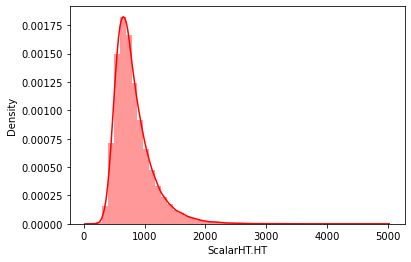

In [84]:
import seaborn as sns
sns.distplot(data['ScalarHT.HT'],color = 'red')


In [142]:
path = Path('/Users/mertdil/Documents/Graduation_Project/root_dataset/Muon.csv') 
muon=pd.read_csv(path)
muon

,entry,subentry,Muon.PT,Muon.Eta,Muon.Phi
0,5,0,101.988350,-0.372222,-2.468785
1,6,0,112.314095,0.461839,-0.515146
2,9,0,32.120620,2.303895,-2.855972
3,9,1,22.929531,0.401627,-2.447952
4,12,0,85.238130,-0.772964,-2.995589
...,...,...,...,...,...
47499,112681,0,78.174545,0.884488,1.368347
47500,112683,0,200.229020,0.878074,-0.080369
47501,112690,0,22.212080,-1.068651,-2.663446
47502,112694,0,16.572788,-1.485904,2.890427


In [143]:
path = Path('/Users/mertdil/Documents/Graduation_Project/root_dataset/MissingET.csv')  
met=pd.read_csv(path)
met

,entry,subentry,MissingET.MET,MissingET.Eta,MissingET.Phi
0,0,0,36.214090,-3.492586,-0.004263
1,1,0,47.813580,3.278284,-2.217949
2,2,0,86.990875,-1.691697,2.479192
3,3,0,135.491090,3.139670,-1.709309
4,4,0,46.716310,-3.652405,2.502415
...,...,...,...,...,...
112692,112692,0,145.078250,-2.466188,2.860018
112693,112693,0,176.645450,-3.355277,2.284243
112694,112694,0,92.884580,0.887530,-2.000315
112695,112695,0,57.419380,-3.322350,-0.373723


In [146]:
path = Path('/Users/mertdil/Documents/Graduation_Project/root_dataset/Muon.csv') 
muon=pd.read_csv(path)


0        101.988350
1        112.314095
2         32.120620
3         22.929531
4         85.238130
            ...    
47499     78.174545
47500    200.229020
47501     22.212080
47502     16.572788
47503     15.000734
Name: Muon.PT, Length: 47504, dtype: float64

In [148]:
muon_PT=muon["Muon.PT"]
electron_PT=electron["Electron.PT"]
jet_PT=jet["Jet.PT"]

PT = pd.concat(muon_PT,electron_PT,jet_PT)
    
    
print(PT)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"

In [ ]:
df = pd.concat(
print(electron,)

In [151]:
import glob
import pandas as pd

# Get CSV files list from a folder
path = '/Users/mertdil/Documents/Graduation_Project/root_dataset/output'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
big_df   = pd.concat(df_list, ignore_index=True)
big_df

,entry,subentry,Electron.PT,Electron.Eta,Electron.Phi,MissingET.MET,MissingET.Eta,MissingET.Phi,Jet.PT,Jet.Phi,Jet.Eta
0,1,0,42.577156,0.139353,-2.204575,NaN,NaN,NaN,NaN,NaN,NaN
1,3,0,42.826904,-1.368815,-1.597842,NaN,NaN,NaN,NaN,NaN,NaN
2,4,0,57.581530,-0.399062,0.898705,NaN,NaN,NaN,NaN,NaN,NaN
3,18,0,149.774290,0.772022,-2.214250,NaN,NaN,NaN,NaN,NaN,NaN
4,23,0,45.287327,1.028192,-1.478880,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1046116,112696,4,NaN,NaN,NaN,NaN,NaN,NaN,49.917526,-2.793012,1.079707
1046117,112696,5,NaN,NaN,NaN,NaN,NaN,NaN,48.000412,1.025576,0.213232
1046118,112696,6,NaN,NaN,NaN,NaN,NaN,NaN,42.487423,1.124510,0.862803
1046119,112696,7,NaN,NaN,NaN,NaN,NaN,NaN,29.142088,1.988514,0.940901


In [98]:
path = Path('/Users/mertdil/Documents/Graduation_Project/root_dataset/combined.csv')  
path.parent.mkdir(parents=True, exist_ok=True)  
big_df.to_csv(path,chunksize=1000)  

In [101]:
data.columns()

TypeError: 'Index' object is not callable

In [103]:
data=pd.read_csv(path)
data.columns


Index(['Unnamed: 0', 'entry', 'subentry', 'Muon.PT', 'Muon.Eta', 'Muon.Phi',
       'FatJet.PT', 'FatJet.Eta', 'FatJet.Phi', 'Electron.PT', 'Electron.Eta',
       'Electron.Phi', 'MissingET.MET', 'MissingET.Eta', 'MissingET.Phi',
       'ScalarHT.HT'],
      dtype='object')

In [104]:
data.describe()

,Unnamed: 0,entry,subentry,Muon.PT,Muon.Eta,Muon.Phi,FatJet.PT,FatJet.Eta,FatJet.Phi,Electron.PT,Electron.Eta,Electron.Phi,MissingET.MET,MissingET.Eta,MissingET.Phi,ScalarHT.HT
count,429382.000000,429382.000000,429382.000000,47504.000000,47504.000000,47504.000000,123088.000000,123088.000000,123088.000000,33396.000000,33396.000000,33396.000000,112697.000000,112697.000000,112697.000000,112697.000000
mean,214690.500000,56332.317233,0.161986,70.242276,0.008532,0.005420,321.397065,0.007971,0.002029,72.841073,-0.002399,-0.011920,111.913365,-0.010529,0.008116,817.804569
std,123952.050979,32518.615817,0.448620,53.287563,1.042872,1.808050,137.912127,0.991708,1.816095,54.392732,1.014038,1.819317,70.558350,2.925545,1.807701,316.657780
min,0.000000,0.000000,0.000000,10.003240,-2.398671,-3.141364,200.000270,-3.750595,-3.141547,10.004865,-2.499015,-3.141488,0.138237,-9.531435,-3.141564,111.139830
25%,107345.250000,28188.000000,0.000000,33.159584,-0.747245,-1.547445,231.550335,-0.684189,-1.569220,34.675138,-0.733275,-1.590020,61.924194,-2.753277,-1.551946,604.576000
50%,214690.500000,56343.000000,0.000000,55.981849,0.015736,-0.012515,276.969880,0.007878,-0.001772,58.580372,0.001720,-0.013642,99.014280,-0.040019,0.014069,743.585400
75%,322035.750000,84480.000000,0.000000,91.366596,0.771446,1.578682,359.374750,0.699313,1.578286,95.035520,0.727862,1.561851,146.678190,2.731053,1.574415,950.001830
max,429381.000000,112696.000000,5.000000,725.659670,2.399368,3.141555,2480.313000,3.757868,3.141545,620.908700,2.499619,3.141309,1412.716300,9.465354,3.141533,4929.727500


In [106]:
data.corr()

,Unnamed: 0,entry,subentry,Muon.PT,Muon.Eta,Muon.Phi,FatJet.PT,FatJet.Eta,FatJet.Phi,Electron.PT,Electron.Eta,Electron.Phi,MissingET.MET,MissingET.Eta,MissingET.Phi,ScalarHT.HT
Unnamed: 0,1.000000,0.238358,-0.317093,-0.000384,-0.001017,0.003294,0.003188,0.001034,-0.001061,0.000150,0.007394,-0.008256,0.002921,-0.000650,-0.000743,0.001167
entry,0.238358,1.000000,0.001794,-0.000381,-0.001029,0.003304,0.003199,0.001034,-0.001066,0.000192,0.007397,-0.008253,0.002921,-0.000650,-0.000743,0.001167
subentry,-0.317093,0.001794,1.000000,-0.177577,0.002560,-0.003490,-0.175731,0.004311,0.000106,-0.145838,0.003697,-0.000472,NaN,NaN,NaN,NaN
Muon.PT,-0.000384,-0.000381,-0.177577,1.000000,0.010104,0.001866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Muon.Eta,-0.001017,-0.001029,0.002560,0.010104,1.000000,-0.008222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Muon.Phi,0.003294,0.003304,-0.003490,0.001866,-0.008222,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FatJet.PT,0.003188,0.003199,-0.175731,NaN,NaN,NaN,1.000000,-0.000613,0.000992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FatJet.Eta,0.001034,0.001034,0.004311,NaN,NaN,NaN,-0.000613,1.000000,-0.000748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FatJet.Phi,-0.001061,-0.001066,0.000106,NaN,NaN,NaN,0.000992,-0.000748,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electron.PT,0.000150,0.000192,-0.145838,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.001038,0.004156,NaN,NaN,NaN,NaN


In [12]:
# create a list containing particle ids of t and tbar
ttbar_pid = [-6,6]

# define a query for ttbar
ttbar_query = 'pid in @ttbar_pid'

# create a new dataframe containing only t and tbar
ttbar_df = particle_df.query(ttbar_query)

ttbar_df

UndefinedVariableError: name 'pid' is not defined

In [9]:
# create a list of four vector components
fvector_components = ['px', 'py', 'pz', 'E']

# create a structured vector (the python library) array
ttbar_fvector = vector.array({field:ttbar_df[field].to_numpy() for field in fvector_components})

NameError: name 'ttbar_df' is not defined

In [10]:
# inspect py (or any other field)
ttbar_fvector['py']

NameError: name 'ttbar_fvector' is not defined

In [ ]:
# calculate rapidity for all t(bar)
ttbar_fvector.rapidity

In [ ]:
# calculate beta for all t(bar)
ttbar_fvector.beta